In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


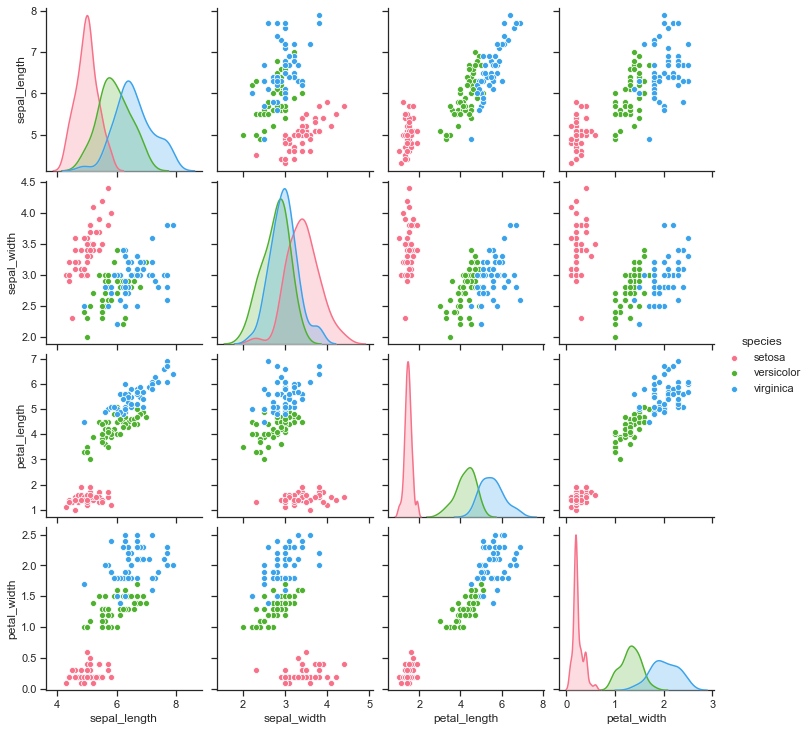

In [3]:
g = sns.pairplot(iris, hue="species", palette="husl")

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((120, 4), (30, 4), (120, 3), (30, 3))

In [10]:
model = Sequential()

model.add(Dense(64, input_shape=(4, ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 39ms/step - loss: 1.0563 - accuracy: 0.4417 - val_loss: 1.0341 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9339 - accuracy: 0.5250 - val_loss: 0.9767 - val_accuracy: 0.5667
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8570 - accuracy: 0.6917 - val_loss: 0.8851 - val_accuracy: 0.5667
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7898 - accuracy: 0.6917 - val_loss: 0.8042 - val_accuracy: 0.6000
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7279 - accuracy: 0.7083 - val_loss: 0.7422 - val_accuracy: 0.6000
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.6917 - val_loss: 0.6965 - val_accuracy: 0.6000
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.7417 - val_loss: 0.6295 - val_accuracy: 0.7333
Epoch 8/100
4/4 [=========

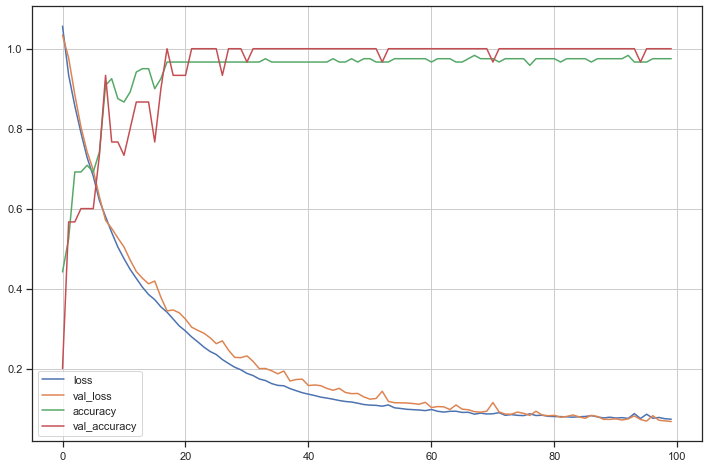

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

1/1 [==============================] - 0s 995us/step - loss: 0.0674 - accuracy: 1.0000
Accuracy = 1.00


In [16]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [18]:
iris.query("species == 'versicolor'")

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor
